# Multi-Qubit Operations
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


### 2.1 CNOT
OK, one qubit is kinda boring after a while... lets look at some two qubit operations!  Build a two qubit circuit, and figure out the truth table (i.e. the transformation for all the different two qubit states) for the CNOT operation `cx(q[0], q[1])` --- this is one of the most important gates in quantum computing!

**NOTE** Qiskit has a weird ordering for indexing the qubits: $\ket{q_n, q_{n-1} \dots q_1 }$

{'01': 1024}


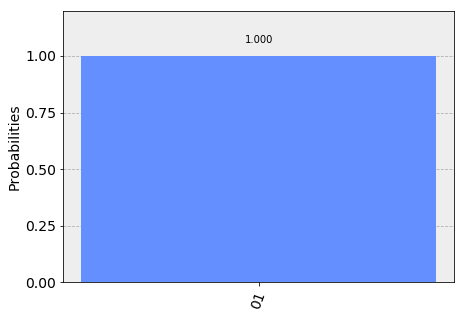

In [5]:
# Build Circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# Apply a CNOT (cx) between qubit 0 and and qubit 2 
qc.cx(q[0], q[1])

# Measure the qubit
qc.barrier(q)

qc.measure(q, c)

# Set the initial state (|00>, |01>, |10>, |11> ...) [QUIBIT 1, QUBIT 0]
opts = {"initial_statevector": np.array([0, 0, 0, 1])}

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024, backend_options=opts)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)

### 2.2 Bell states

The CNOT has this interesting property where the first qubit controls the second qubit.  Let's look what happens when you put the control qubit in one of these fancy superposition!
To do this:
- start with the $\ket{00}$ state
- apply a Hadmard to qubit 0 
- apply the CNOT operation between qubit 0 and qubit 1

Once you've done this, try:
- applying a Hadamard to both qubits before they are meausured.
- apply just one Hadamard

{'00': 504, '11': 520}


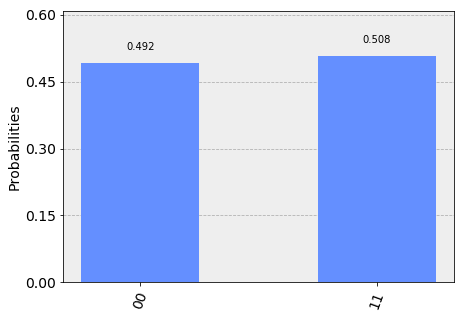

In [9]:
# Build Circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])

# Measure the qubit
qc.barrier(q)

qc.x(q[0])
qc.x(q[1])

qc.measure(q, c)
qc.draw()


# Set the initial state (|00>, |01> ...)
opts = {"initial_statevector": np.array([1, 0, 0, 0])}

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024, backend_options=opts)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)